## Implementation of multivariate Batch Adam and mini batch Adam optimizers with linear regression from scratch

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
dataset= pd.read_csv(r'D:\ITI\numerical_optimization\labs\MultipleLR.csv - MultipleLR.csv.csv', header=None)
dataset.insert(loc=0,column="0",value=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,])
dataset

,0,0,1,2,3
0,1,73,80,75,152
1,1,93,88,93,185
2,1,89,91,90,180
3,1,96,98,100,196
4,1,73,66,70,142
5,1,53,46,55,101
6,1,69,74,77,149
7,1,47,56,60,115
8,1,87,79,90,175
9,1,79,70,88,164


In [121]:
dataset.columns = ['0','1','2','3','4']
dataset

,0,1,2,3,4
0,1,73,80,75,152
1,1,93,88,93,185
2,1,89,91,90,180
3,1,96,98,100,196
4,1,73,66,70,142
5,1,53,46,55,101
6,1,69,74,77,149
7,1,47,56,60,115
8,1,87,79,90,175
9,1,79,70,88,164


In [122]:
numpy_array=dataset.to_numpy()
A=numpy_array[:,0:4]
Y=numpy_array[:,4].reshape(25,1)
Y

array([[152],
       [185],
       [180],
       [196],
       [142],
       [101],
       [149],
       [115],
       [175],
       [164],
       [141],
       [141],
       [184],
       [152],
       [148],
       [192],
       [147],
       [183],
       [177],
       [159],
       [177],
       [175],
       [175],
       [149],
       [192]], dtype=int64)

In [123]:
def batch_adam(A,Y):
    alpha=0.001
    epochs=800
    m=len(Y)
    batch_size=m
  
    B1=0.01
    B2=0.01
    E=pow(10,-8)

    vt = np.zeros((A.shape[1],1))
    mt = np.zeros((A.shape[1],1))
    count=0

    errors=[]
    iterations=[]
    final_thetas=[]
    theta_0=[]
    theta_1=[]
    theta_2=[]
    theta_3=[]

    thetas=np.zeros((4,1))
    for J in range(epochs):
        for i in range(0,m,batch_size):
            final_thetas.clear()
            A_batch=A[i:i+batch_size,:]
            Y_batch=Y[i:i+batch_size]
            
            hyp=A_batch@thetas
        
            err=hyp-Y_batch
            J=(err.T@err)/(2*len(Y_batch))
            #J=(1/2*25)*np.sum(np.power(hyp-Y,2))
            errors.append(J[0][0])
        
            gradient=1/len(Y_batch)*(A_batch.T@err)
            equiv_gradient=(np.sqrt(np.sum(np.power((gradient),2))))
        
        
            vt=(B2*vt)+((1-B2)*(pow(gradient,2)))
            vt_mod=vt/(1-pow(B2,i+1))
            vt_s=np.sqrt(vt_mod)
        
            mt=(B1*mt)+((1-B1)*gradient)
            mt_mod=mt/(1-pow(B1,i+1))
        
            thetas=thetas-((alpha/(vt_s+E)))*mt_mod
            theta_0.append(thetas[-4])
            theta_1.append(thetas[-3])
            theta_2.append(thetas[-2])
            theta_3.append(thetas[-1])
        
            final_thetas.append(thetas)
            iterations.append(count)
            count+=1
    
    
            if(i>=2):
                if(abs((errors[-2]-errors[-1])<0.00001 or equiv_gradient<0.001)):
                    break
                                
    print("number of iterations",count)   
    print("the final weights are",final_thetas)

    return final_thetas,iterations,errors,theta_0,theta_1,theta_2,theta_3

In [124]:
final_thetas,iterations,errors,theta_0,theta_1,theta_2,theta_3=batch_adam(A,Y)
final_pred_val=A@final_thetas
final_pred_val
final_pred_val=final_pred_val[0].reshape(-1,1)
final_pred_val

number of iterations 800
the final weights are [array([[0.66922148],
       [0.66396444],
       [0.65996117],
       [0.69189193]])]


array([[153.82741444],
       [184.84044745],
       [182.0887974 ],
       [198.27519603],
       [141.12849838],
       [104.27160712],
       [148.59557352],
       [110.34689185],
       [172.84133446],
       [160.20618453],
       [143.1881611 ],
       [141.24421162],
       [188.07639178],
       [156.42741722],
       [149.29146872],
       [187.57608443],
       [149.00418725],
       [178.1927965 ],
       [179.31722639],
       [160.51090403],
       [174.14124045],
       [173.4653616 ],
       [166.0460395 ],
       [155.03162354],
       [191.5159305 ]])

Text(0, 0.5, 'Costs')

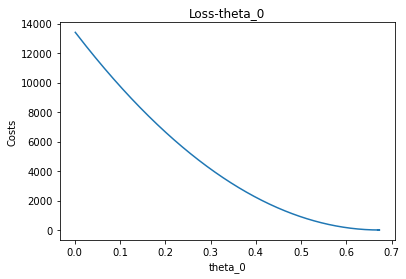

In [125]:
plt.plot(theta_0,errors)
plt.title('Loss-theta_0')
plt.xlabel('theta_0')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

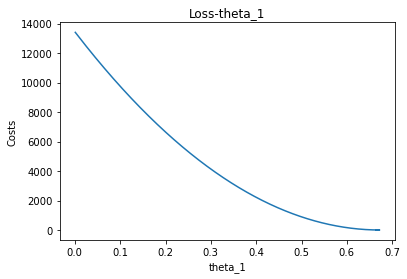

In [126]:
plt.plot(theta_1,errors)
plt.title('Loss-theta_1')
plt.xlabel('theta_1')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

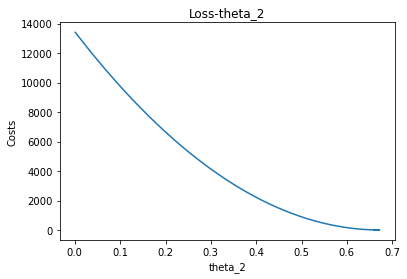

In [127]:
plt.plot(theta_2,errors)
plt.title('Loss-theta_2')
plt.xlabel('theta_2')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

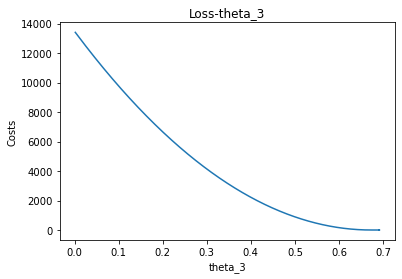

In [128]:
plt.plot(theta_3,errors)
plt.title('Loss-theta_3')
plt.xlabel('theta_3')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

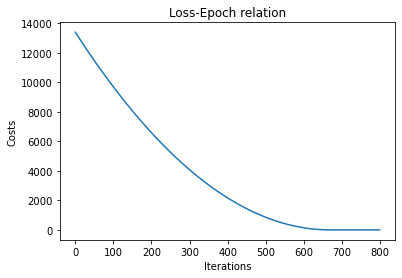

In [129]:
plt.plot(iterations,errors)
plt.title('Loss-Epoch relation')
plt.xlabel('Iterations')
plt.ylabel('Costs')

In [130]:
from sklearn.metrics import r2_score
r2_score(Y,final_pred_val)

0.9791253417765764

In [131]:
def mini_batch_adam(A,Y,batch_size):
    alpha=0.001
    epochs=800
    m=len(Y)

    B1=0.01
    B2=0.01
    E=pow(10,-8)

    vt = np.zeros((A.shape[1],1))
    mt = np.zeros((A.shape[1],1))
    count=0

    errors=[]
    iterations=[]
    final_thetas=[]
    theta_0=[]
    theta_1=[]
    theta_2=[]
    theta_3=[]

    thetas=np.zeros((4,1))
    for J in range(epochs):
        for i in range(0,m,batch_size):
            final_thetas.clear()
            A_batch=A[i:i+batch_size,:]
            Y_batch=Y[i:i+batch_size]
            
            hyp=A_batch@thetas
        
            err=hyp-Y_batch
            J=(err.T@err)/(2*len(Y_batch))
            #J=(1/2*25)*np.sum(np.power(hyp-Y,2))
            errors.append(J[0][0])
        
            gradient=1/len(Y_batch)*(A_batch.T@err)
            equiv_gradient=(np.sqrt(np.sum(np.power((gradient),2))))
        
        
            vt=(B2*vt)+((1-B2)*(pow(gradient,2)))
            vt_mod=vt/(1-pow(B2,i+1))
            vt_s=np.sqrt(vt_mod)
        
            mt=(B1*mt)+((1-B1)*gradient)
            mt_mod=mt/(1-pow(B1,i+1))
        
            thetas=thetas-((alpha/(vt_s+E)))*mt_mod
            theta_0.append(thetas[-4])
            theta_1.append(thetas[-3])
            theta_2.append(thetas[-2])
            theta_3.append(thetas[-1])
        
            final_thetas.append(thetas)
            iterations.append(count)
            count+=1
    
    
            if(i>=2):
                if(abs((errors[-2]-errors[-1])<0.00001 or equiv_gradient<0.001)):
                    break
                                
    print("number of iterations",count)   
    print("the final weights are",final_thetas)

    return final_thetas,iterations,errors,theta_0,theta_1,theta_2,theta_3

In [132]:
batch_size=5
final_thetas,iterations,errors,theta_0,theta_1,theta_2,theta_3=mini_batch_adam(A,Y,batch_size)
final_pred_val=A@final_thetas
final_pred_val
final_pred_val=final_pred_val[0].reshape(-1,1)
final_pred_val

number of iterations 1829
the final weights are [array([[0.6787053 ],
       [0.6723885 ],
       [0.67078272],
       [0.675439  ]])]


array([[154.08360834],
       [185.05554208],
       [182.35201924],
       [198.50860779],
       [141.31545525],
       [104.32044589],
       [148.72023605],
       [110.37113713],
       [172.95784962],
       [160.19081918],
       [143.33534916],
       [141.32926306],
       [188.40014311],
       [156.7670613 ],
       [149.39728083],
       [187.75264181],
       [149.36356419],
       [178.32844557],
       [179.64865745],
       [160.80877698],
       [174.29138618],
       [173.62237028],
       [166.21228902],
       [155.41136597],
       [191.77749917]])

Text(0, 0.5, 'Costs')

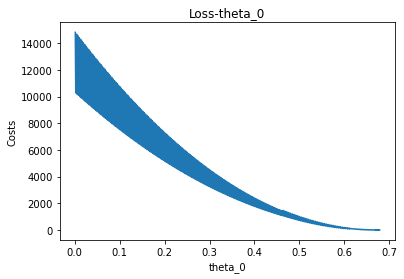

In [133]:
plt.plot(theta_0,errors)
plt.title('Loss-theta_0')
plt.xlabel('theta_0')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

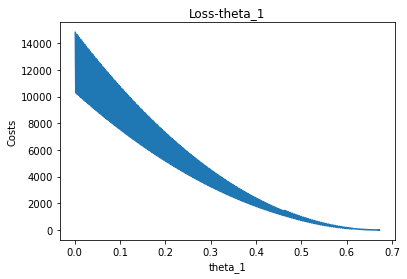

In [134]:
plt.plot(theta_1,errors)
plt.title('Loss-theta_1')
plt.xlabel('theta_1')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

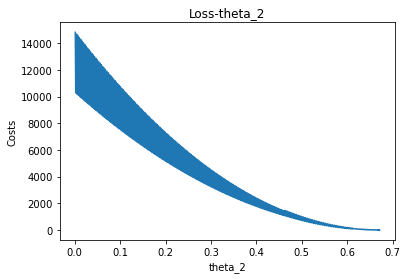

In [135]:
plt.plot(theta_2,errors)
plt.title('Loss-theta_2')
plt.xlabel('theta_2')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

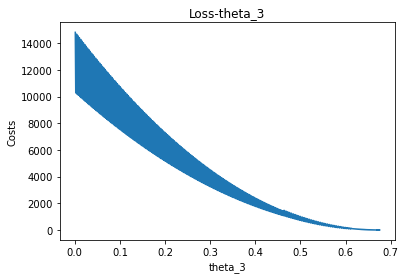

In [136]:
plt.plot(theta_3,errors)
plt.title('Loss-theta_3')
plt.xlabel('theta_3')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

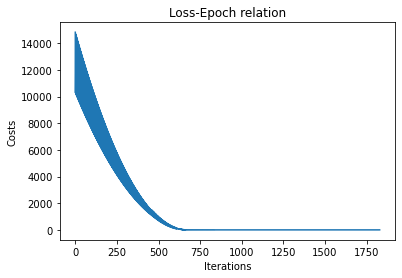

In [137]:
plt.plot(iterations,errors)
plt.title('Loss-Epoch relation')
plt.xlabel('Iterations')
plt.ylabel('Costs')

In [138]:
from sklearn.metrics import r2_score
r2_score(Y,final_pred_val)

0.9783206829688866